In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
cur_path = "/content/drive/MyDrive/BDB 2024/"
os.chdir(cur_path)
!pwd

Mounted at /content/drive
/content/drive/MyDrive/BDB 2024


# Introduction

One of the most common ways to end a play in football is to tackle the player with the ball. Missed tackles can hinder a team's performance by allowing additional yards or allowing touchdowns; therefore, finding a player with a strong tackling ability can improve a team's chance of getting the opposing team's ball carrier down and mitigating damage. The below figure shows that plays with a mistackle have a higher yards per play than all plays with a tackle attempt. This difference is statistically significant at the 95% confidence level.

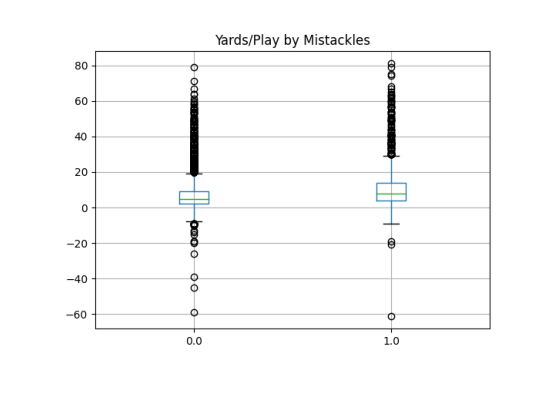

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Read Images
img = mpimg.imread('./mistackles_avg_result.png')

# Output Images
plt.imshow(img)
plt.tick_params(left = False, bottom = False)
# xticks color white
plt.xticks(color='w')

# yticks color white
plt.yticks(color='w')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)

How can we predict a player's tackling ability to prevent these additional yards? We can use the the total number of tackles a player has as a baseline and improve upon this. The below figure shows the correlation of tackles from weeks 1-4 (x-axis) and weeks 5-8 (y-axis). The data gives evidence that there is a moderate positive correlation between the two samples which is a strong baseline to work with.

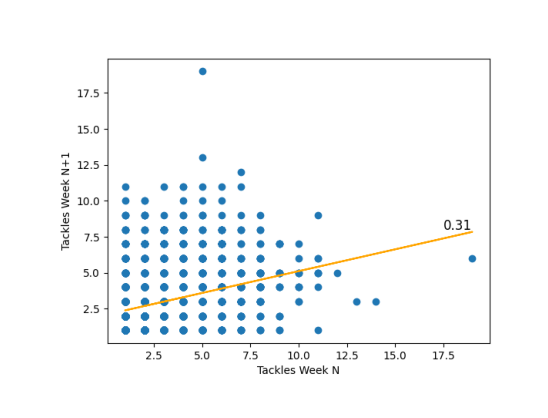

In [3]:
# Insert MAD vs tackles visual
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Read Images
img = mpimg.imread('./tacklescorr.png')

# Output Images
plt.imshow(img)
plt.tick_params(left = False, bottom = False)
# xticks color white
plt.xticks(color='w')

# yticks color white
plt.yticks(color='w')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)

This paper will look to improve upon this by measuring the mean absolute difference (MAD) for a player's actual pursuit angle and his optimal pursuit angle.

# Data

The data used in this study comes from weeks 1-8 in the 2022 season. The main datasets include tracking data, high-level game, play, player, and tackle data.

## Feature Engineering

From this data, base metrics were used like the down, distance, yards to go, speed of the defender and ball carrier, and acceleration of the defender and ball carrier. Additional features were also created to enhance the analysis like a standardization of the x- and y-coordinates as well as a standardization of the orientation and direction of the defender and ball carrier. Additionally, the defenders distance to the nearest offensive non-ball carrier was used to determine the nearest blocker to the defender. Finally, the label feature, pursuit angle, was created using the intersecting point of the defender and ball carrier which was derived from creating a line from both players using the player's respective direction. An example is shown below.

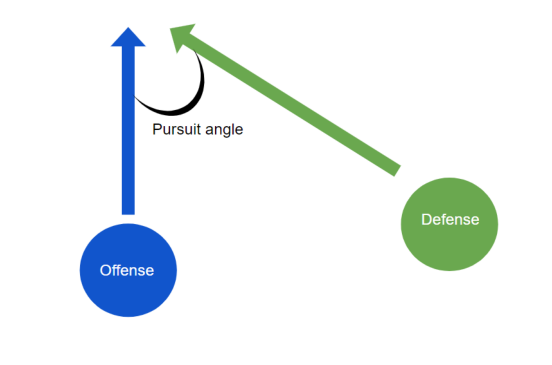

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Read Images
img = mpimg.imread('./PursuitAngleExample.png')

# Output Images
plt.imshow(img)
plt.tick_params(left = False, bottom = False)
# xticks color white
plt.xticks(color='w')

# yticks color white
plt.yticks(color='w')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)

# Model

A logistic regression model was used to calculate the optimal pursuit angle with the following independent features:

- Standardized x (defender and ball carrier)
- Standardized y (defender and ball carrier)
- Standardized direction (defender and ball carrier)
- Standardized orientation (defender and ball carrier)
- speed (defender and ball carrier)
- acceleration (defender and ball carrier)
- distance from the defender to the ball carrier
- distance from the defender to the nearest offensive non-ball carrier
- down
- distance
- yardline number

The dependent (label) feature used is the pursuit angle.


# Results

From the logistic regression model, the below figure shows the features in order of importance to the model. As expected, the distance to the carrier is one of the more important features in the model. This is expected because the closer the defender is to the offensive player, the more precise the angle must be because there is less room for error.

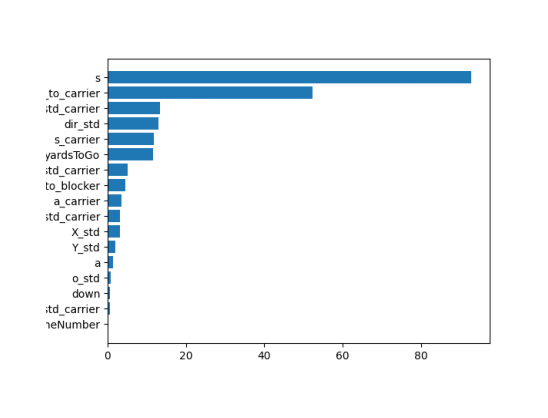

In [ ]:
# Insert feature importance visual
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Read Images
img = mpimg.imread('./featureimportance.png')

# Output Images
plt.imshow(img)
plt.tick_params(left = False, bottom = False)
# xticks color white
plt.xticks(color='w')

# yticks color white
plt.yticks(color='w')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)

The correlation for MAD and tackles is used to determine if using the MAD will be a better predictor of tackling ability than tackles. The below visual shows the correlation between MAD and tackles. When filtering for players with more than 20 tackles during weeks 1-8 for the 2022 season, there is evidence that the correlation between MAD and tackles is just as good at predicting tackles as using tackles.

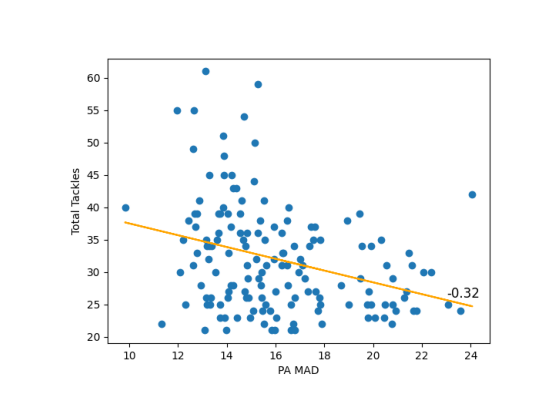

In [ ]:
# Insert MAD vs tackles visual
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Read Images
img = mpimg.imread('./madtackles.png')

# Output Images
plt.imshow(img)
plt.tick_params(left = False, bottom = False)
# xticks color white
plt.xticks(color='w')

# yticks color white
plt.yticks(color='w')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)

Given the strong ability to predict tackling ability, we can see which players are the best tacklers based on pursuit angle MAD, smaller MAD numbers are better. The below table lists the top 10 tacklers. Players like Bobby Wagner, C.J. Mosley, Ernest Jones, Quay Walker, Demario Davis, Shaq Thompson, T.J. Edwards, and Zaire Franklin all finished the 2022 season in the top 50 players for tackles with Franklin, Edwards, and Mosley finishing inside the top 10.


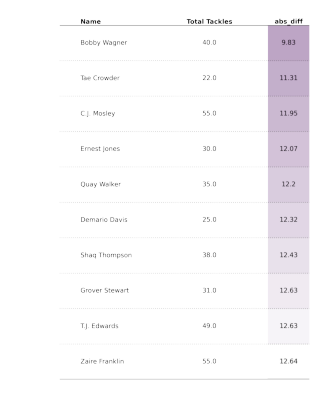

In [ ]:
# Insert MAD vs tackles visual
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Read Images
img = mpimg.imread('./abs_diff.png')

# Output Images
plt.imshow(img)
plt.tick_params(left = False, bottom = False)
# xticks color white
plt.xticks(color='w')

# yticks color white
plt.yticks(color='w')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)

# Conclusions, Limitations, and Future Research

Tackling is one of the most common ways to end a play. It is also one the most important abilities for a defender because missed tackles can lead to additional yards if not touchdowns. From this research, we now have a way to predict future tackles that does just as good of a job at predicting future tackles as tackles.

Future research on this subject can be used to improve the performace of the model. Adding features such as player location of all players on the field and number of blockers in between the defender and ball carrier can be used to improve the performance.